In [204]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns

In [205]:
file = 'posts-en.csv'

In [206]:
posts = pd.read_csv(file)
print(posts.columns)
print(f'# of Posts: {posts.shape[0]}')

Index(['Unnamed: 0', 'keyword', 'title', 'author', 'body', 'time', 'date',
       'status', 'votes', 'num_comments', 'num_comment_pages', 'link', 'lang'],
      dtype='object')
# of Posts: 911


In [207]:
posts.date = posts.date.str.replace('‎','')

In [208]:
# filter out only implemented pots
impl_posts = posts[(posts['keyword'] == 'implemented')]

# Simple stats for implemented posts

# implemented & votes correlation, avg vote number of implemented posts
avg_votes = impl_posts.votes.mean()
print(f'Average # of Votes for Implemented Ideas: {avg_votes}')

# implemented & num of comments correlation, avg comment number of implemented posts
avg_comments = impl_posts.num_comments.mean()
print(f'Average # of Comments for Implemented Ideas: {avg_comments}')

# implemented & length of posts correlation, avg length of an implemented post
body_length = impl_posts.body.apply(lambda x: len(x.split()))
avg_length = body_length.mean()
print(f'Average # of Body Length for Implemented Ideas: {avg_length}')

Average # of Votes for Implemented Ideas: 1471.8449367088608
Average # of Comments for Implemented Ideas: 219.74683544303798
Average # of Body Length for Implemented Ideas: 90.29430379746836


<Axes: title={'center': 'Number of Words in Implemented Post Body'}, xlabel='# of Words', ylabel='# of Posts'>

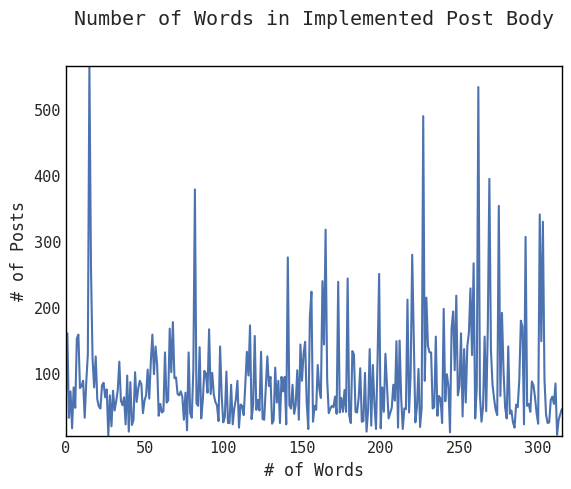

In [209]:
# counts the number of words in each post
body_length = impl_posts.body.apply(lambda x: len(x.split())).plot(title="Number of Words in Implemented Post Body")
body_length.set_xlabel('# of Words')
body_length.set_ylabel('# of Posts')
body_length

<Axes: title={'center': 'Number of Words in Implemented Post Body'}, xlabel='# of Words', ylabel='# of Posts'>

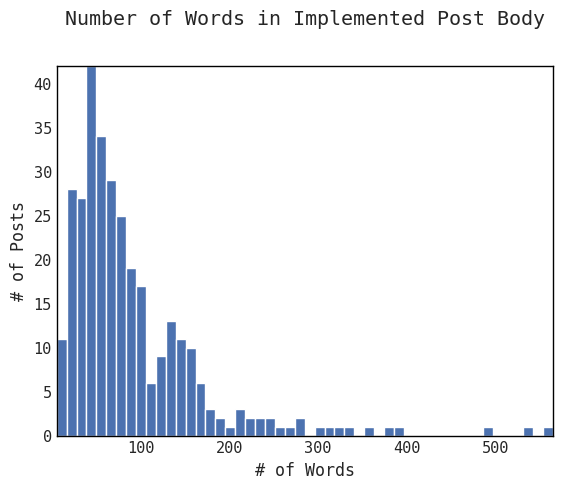

In [210]:
# counts the number of words in each post
body_length = impl_posts.body.apply(lambda x: len(x.split())).plot.hist(bins=50, title="Number of Words in Implemented Post Body")
body_length.set_xlabel('# of Words')
body_length.set_ylabel('# of Posts')
body_length

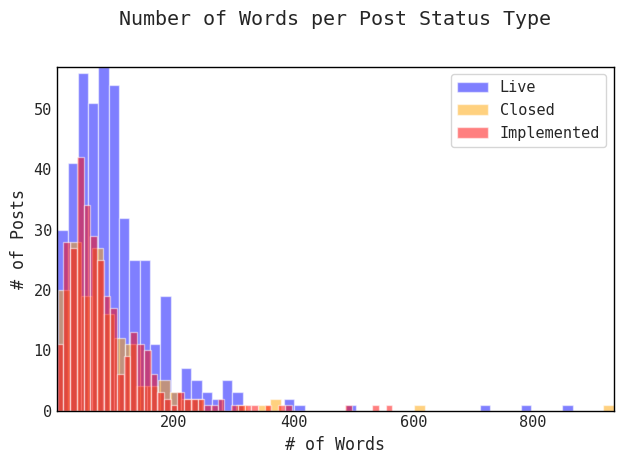

In [211]:
# filter out only implemented pots
live_posts = posts[(posts['keyword'] == 'live')]
closed_posts = posts[(posts['keyword'] == 'closed')]
plt.title('Number of Words per Post Status Type')
 
plt.hist(live_posts.body.apply(lambda x: len(x.split())),color='blue',bins=50,label='Live',alpha=0.5)
plt.hist(closed_posts.body.apply(lambda x: len(x.split())),color='orange',bins=50,label='Closed',alpha=0.5)
plt.hist(impl_posts.body.apply(lambda x: len(x.split())),color='red',bins=50,label='Implemented',alpha=0.5)

 
plt.legend(loc='upper right')
plt.xlabel('# of Words')
plt.ylabel('# of Posts') 
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Number of Votes on Implemented Posts'}, xlabel='# of Votes', ylabel='# of Posts'>

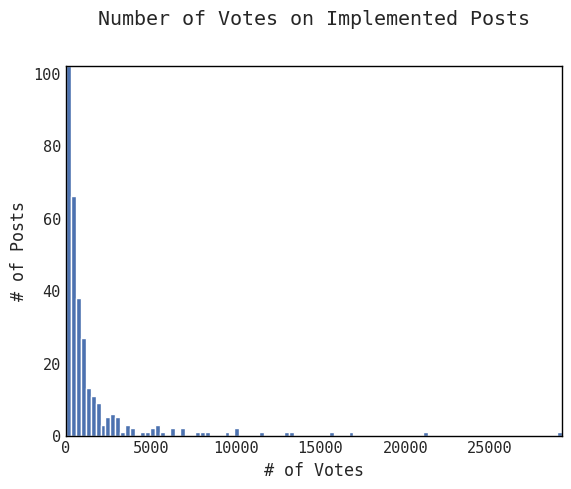

In [212]:
votes = impl_posts.votes.plot.hist(bins=100, title="Number of Votes on Implemented Posts")
votes.set_xlabel('# of Votes')
votes.set_ylabel('# of Posts')
votes

In [213]:
# 221 Posts have less than 1,000 votes
# we commonly see requested posts with at leaset 1,000 votes
(impl_posts.votes < 1000).sum()

221

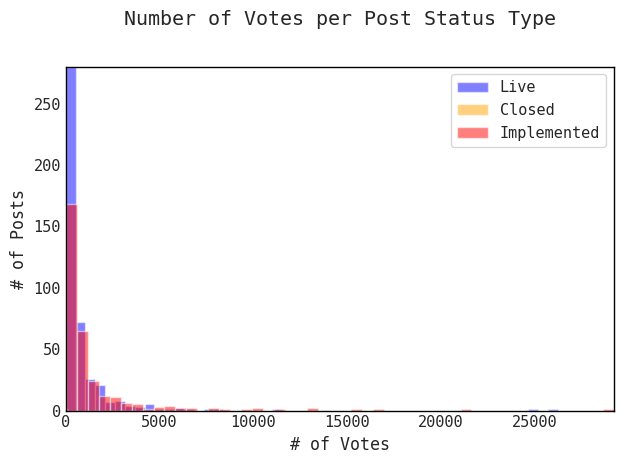

In [214]:
# filter out only implemented pots
live_posts = posts[(posts['keyword'] == 'live')]
closed_posts = posts[(posts['keyword'] == 'closed')]
plt.title('Number of Votes per Post Status Type')
 
# edgecolor='black'
plt.hist(live_posts.votes, color='blue',bins=50,label='Live',alpha=0.5)
plt.hist(closed_posts.votes, color='orange',bins=50,label='Closed',alpha=0.5)
plt.hist(impl_posts.votes, color='red',bins=50,label='Implemented',alpha=0.5)
 
plt.legend(loc='upper right')
plt.xlabel('# of Votes')
plt.ylabel('# of Posts') 
plt.tight_layout()
plt.show()

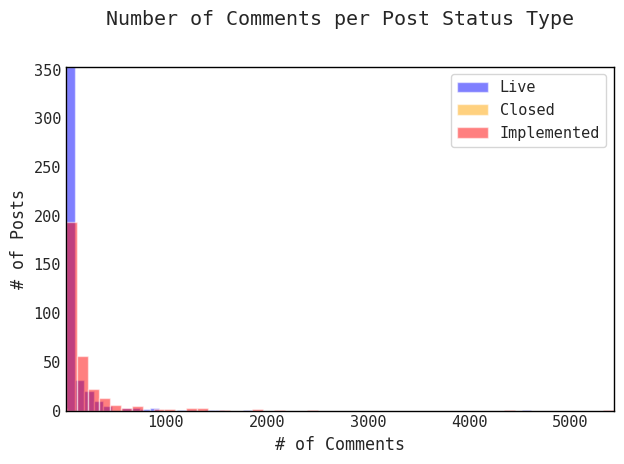

In [215]:
# filter out only implemented pots
live_posts = posts[(posts['keyword'] == 'live')]
closed_posts = posts[(posts['keyword'] == 'closed')]
plt.title('Number of Comments per Post Status Type')
 
# edgecolor='black'
plt.hist(live_posts.num_comments, color='blue',bins=50,label='Live',alpha=0.5)
plt.hist(closed_posts.num_comments, color='orange',bins=50,label='Closed',alpha=0.5)
plt.hist(impl_posts.num_comments, color='red',bins=50,label='Implemented',alpha=0.5)
 
plt.legend(loc='upper right')
plt.xlabel('# of Comments')
plt.ylabel('# of Posts') 
plt.tight_layout()
plt.show()

In [216]:
count_ideas_year = impl_posts.date.str.extract(r'(20[0-9]{2})').value_counts(sort=False)
year_counts = count_ideas_year.tolist()
years = [count_ideas_year.axes[0][i][0] for i in range(len(count_ideas_year.axes[0]))]

impl_posts['year'] = impl_posts.date.str.extract(r'(20[0-9]{2})')

/var/folders/8d/h9kpfzhn62g2sh22v0q3bm200000gn/T/ipykernel_67848/1045314131.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  impl_posts['year'] = impl_posts.date.str.extract(r'(20[0-9]{2})')


In [217]:
# so I want a DF that has the year, mean_year, and then vote count for that individual post
# we generate a pd.Serie with the mean temperature for each year (used later for colors in the FacetGrid plot), and we create a new column in dataframe
year_mean_serie = impl_posts.groupby('year')['votes'].mean()
impl_posts['mean_year'] = impl_posts['year'].map(year_mean_serie)

/var/folders/8d/h9kpfzhn62g2sh22v0q3bm200000gn/T/ipykernel_67848/3201513728.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  impl_posts['mean_year'] = impl_posts['year'].map(year_mean_serie)


<Axes: title={'center': 'Average Votes for Implemented Ideas Each Year'}, xlabel='Year', ylabel='Average Number of Votes'>

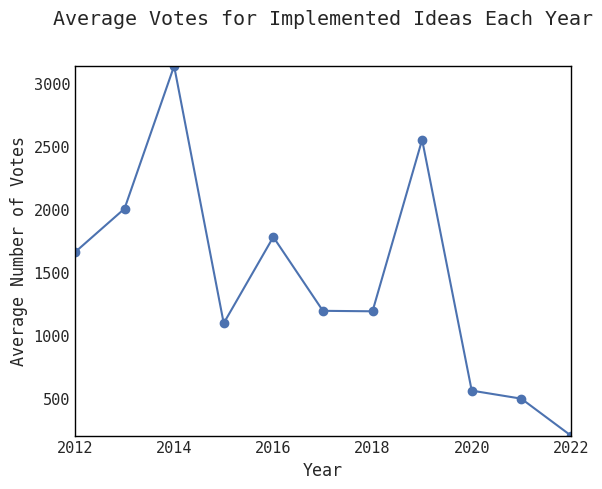

In [218]:
year_mean_serie.plot(linestyle='-', marker='o', title="Average Votes for Implemented Ideas Each Year", xlabel="Year", ylabel="Average Number of Votes")

<Axes: title={'center': 'Number of Words in Implemented Post Body'}, xlabel='# of Words', ylabel='# of Posts'>

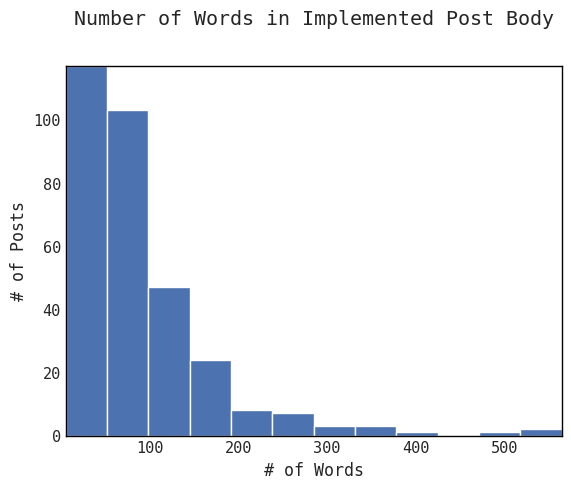

In [219]:
# counts the number of words in each post
body_length = impl_posts.body.apply(lambda x: len(x.split())).plot.hist(bins=12, title="Number of Words in Implemented Post Body")
body_length.set_xlabel('# of Words')
body_length.set_ylabel('# of Posts')
body_length

In [220]:
all_cate_raw = posts.title.str.extractall(r'\[(.*?)\]')
all_cate_count = all_cate_raw.value_counts()
all_cate = [all_cate_count.axes[0][i][0] for i in range(len(all_cate_count.axes[0]))]

# for i in all_cate:
#     print(i)

In [221]:
cate_file = 'Categories.csv'
org_cate = pd.read_csv(cate_file)
print(org_cate.columns)

Index(['Original', 'Platform', 'Feature'], dtype='object')


In [222]:
org_cate.head(5)

,Original,Platform,Feature
0,Desktop,Desktop,No
1,Mobile,Mobile,No
2,Playlists,All,No
3,All Platforms,All,No
4,Other,No,No


In [223]:
impl_posts

,Unnamed: 0,keyword,title,author,body,time,date,status,votes,num_comments,num_comment_pages,link,lang,year,mean_year
0,0,implemented,[Mobile] Click lyric to go to lyric time,marcosw,To be able to go to the lyric part of a song a...,02:43 AM,2022-02-08,NaN,311,10,1,https://community.spotify.com/t5/Implemented-I...,en,2022,206.500000
1,1,implemented,"[Mobile][Your Library] ""Spotify Playlists"" folder",Peter,Idea: Create a separate folder in Your Library...,08:52 AM,2022-01-04,NaN,102,10,1,https://community.spotify.com/t5/Implemented-I...,en,2022,206.500000
2,2,implemented,[AutoPlay] Option to toggle Autoplay on/off ac...,nirshtuhl,The Autoplay setting isn't working for connect...,07:39 PM,2021-10-26,NaN,1667,370,37,https://community.spotify.com/t5/Implemented-I...,en,2021,498.842105
3,3,implemented,[All Platforms] Support for Apple Shareplay,jtylerhartley,I would love to see Spotify adopt support for ...,07:32 PM,2021-10-25,NaN,106,10,1,https://community.spotify.com/t5/Implemented-I...,en,2021,498.842105
4,4,implemented,[Desktop][Playlists] Enhance Playlist on Desktop,caduceusmi7,Please introduce the Enhance Playlist on Deskt...,03:22 PM,2021-10-21,NaN,620,40,4,https://community.spotify.com/t5/Implemented-I...,en,2021,498.842105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,313,implemented,Please make the Spotify Android app functional...,SteveBrammer,A new version of the Spotify iOS app (0.4.23) ...,01:43 AM,2012-02-11,NaN,301,30,3,https://community.spotify.com/t5/Implemented-I...,en,2012,1658.258824
312,314,implemented,iPad app,Niklas,We want a ipad app! 🙂,10:34 PM,2012-02-09,NaN,809,240,24,https://community.spotify.com/t5/Implemented-I...,en,2012,1658.258824
313,315,implemented,Way to prevent duplicates in playlists.,LakeWorthB,"I have big playlists, and would like a built i...",09:43 PM,2012-02-09,NaN,5440,510,51,https://community.spotify.com/t5/Implemented-I...,en,2012,1658.258824
314,316,implemented,Enable email registration to Spotify,jayy,It would be nice to be able to open up the reg...,06:35 PM,2012-02-09,NaN,1096,220,22,https://community.spotify.com/t5/Implemented-I...,en,2012,1658.258824


In [224]:
impl_posts.title.str.extractall(r'\[(.*?)\]')

0
    match               
0   0             Mobile
1   0             Mobile
    1       Your Library
2   0           AutoPlay
3   0      All Platforms
...                  ...
294 0      All Platforms
295 0       Partnerships
304 0            Windows
306 0            Desktop
315 0          Playlists

[254 rows x 1 columns]

In [225]:
unfiltered_cate_count = impl_posts.title.str.extractall(r'\[(.*?)\]').value_counts()

In [226]:
platforms = {}

plat_cate = set(org_cate.Platform)
plat_cate.remove('No')

# Create platforms dictionary for counting posts
for i in sorted(plat_cate):
    platforms[i] = 0

In [227]:
for idx, i in enumerate(unfiltered_cate_count):
    plat = org_cate[org_cate['Original'] == unfiltered_cate_count.axes[0][idx][0]].Platform.values[0]
    if plat != 'No' and plat in platforms:
        platforms[plat] += i

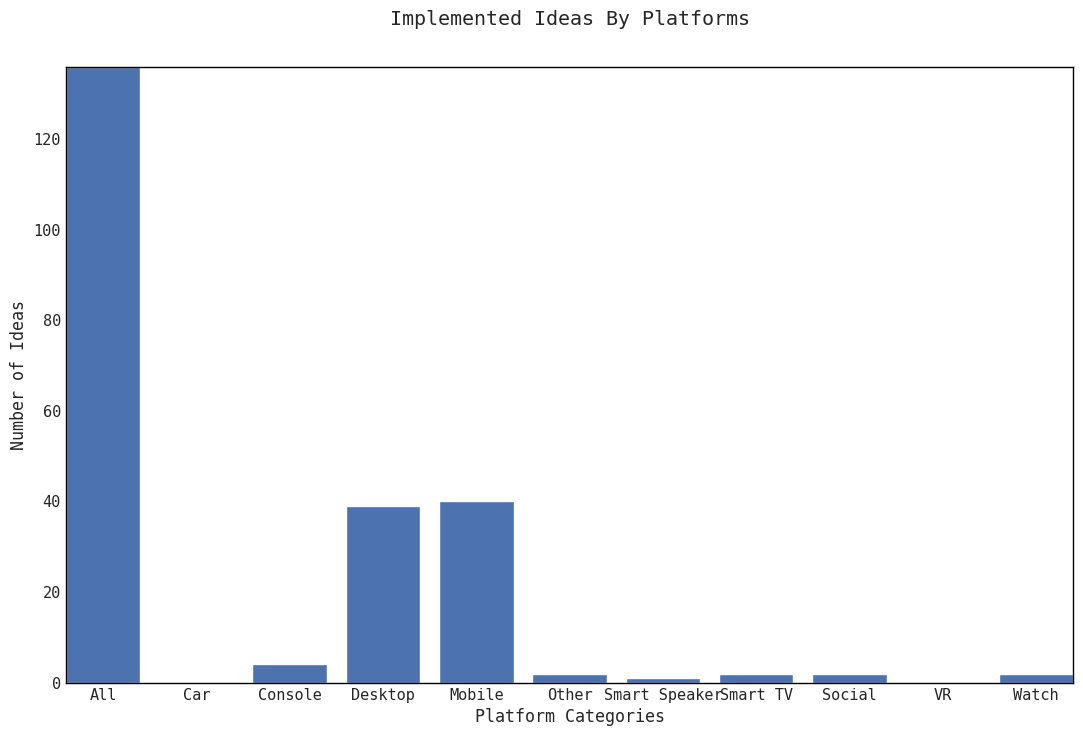

In [228]:
# Plot by Platform Categories
plat_keys = platforms.keys()
plat_values = platforms.values()

plt.figure(figsize=(13,8))
plt.bar(plat_keys, plat_values)
plt.title("Implemented Ideas By Platforms")
plt.xlabel("Platform Categories")
plt.ylabel("Number of Ideas")
plt.show()

In [229]:
# Features
features = {}

for i in sorted(org_cate[org_cate['Feature'] == 'Yes'].Original.values):
    features[i] = 0

In [230]:
for idx, i in enumerate(unfiltered_cate_count):
    feat = unfiltered_cate_count.axes[0][idx][0]
    if feat in features:
        features[feat] += i

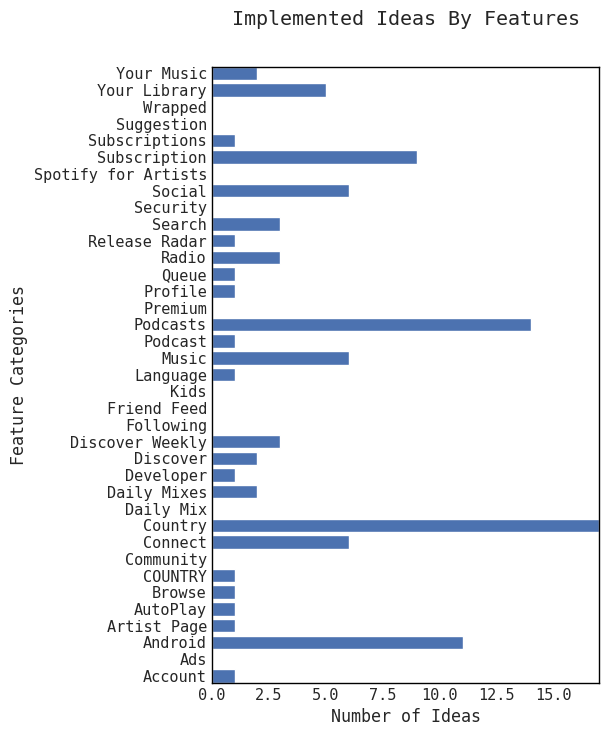

In [231]:
feat_keys = [i for i in features.keys()]
feat_values = [i for i in features.values()]

plt.figure(figsize=(5,8))
plt.barh(feat_keys, feat_values)
plt.title("Implemented Ideas By Features")
plt.ylabel("Feature Categories")
plt.xlabel("Number of Ideas")
plt.show()

Text(0, 0.5, '# of Times')

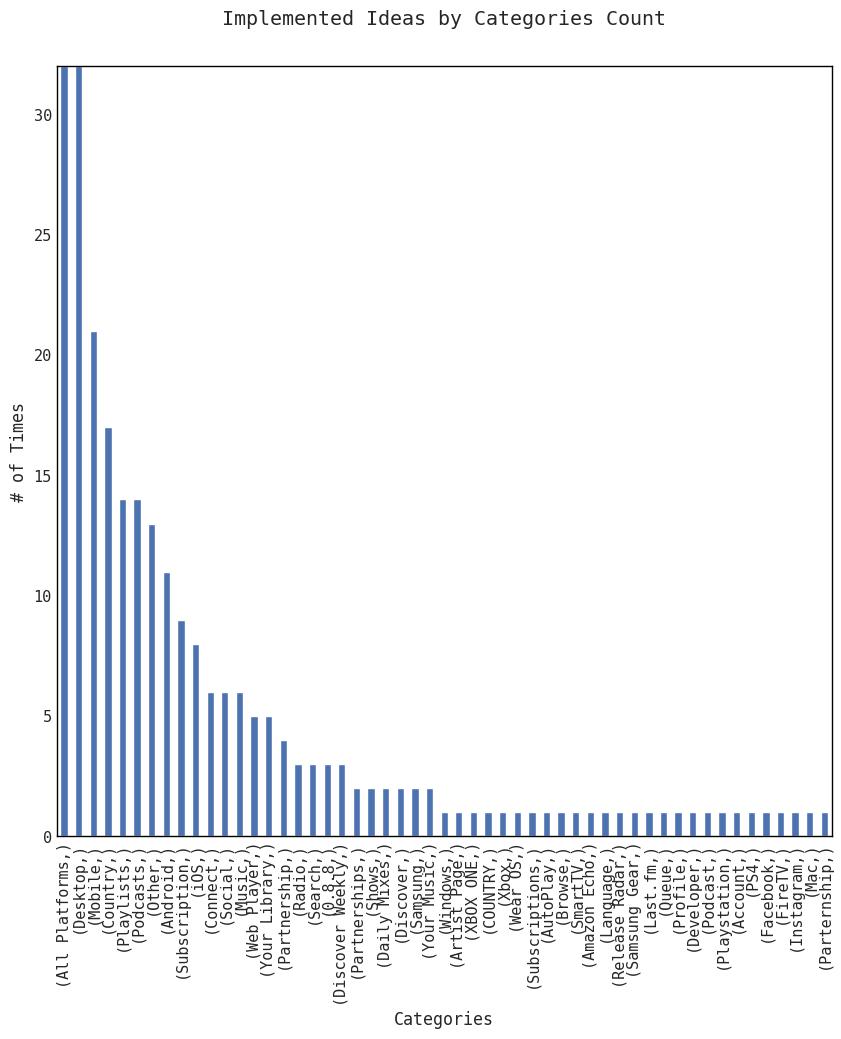

In [232]:
# posts categories
categories = impl_posts.title.str.extractall(r'\[(.*?)\]')

# ax = categories.value_counts().plot(kind='bar', figsize=(30, 15), title='Implemented Ideas by Categories Count')
ax = categories.value_counts().plot(kind='bar', figsize=(10, 10), title='Implemented Ideas by Categories Count')
ax.set_xlabel('Categories')
ax.set_ylabel('# of Times')

In [233]:
categories.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

All Platforms      12.6%
Desktop            12.6%
Mobile              8.3%
Country             6.7%
Playlists           5.5%
Podcasts            5.5%
Other               5.1%
Android             4.3%
Subscription        3.5%
iOS                 3.1%
Connect             2.4%
Social              2.4%
Music               2.4%
Web Player          2.0%
Your Library        2.0%
Partnership         1.6%
Radio               1.2%
Search              1.2%
0.8.8               1.2%
Discover Weekly     1.2%
Partnerships        0.8%
Shows               0.8%
Daily Mixes         0.8%
Discover            0.8%
Samsung             0.8%
Your Music          0.8%
Windows             0.4%
Artist Page         0.4%
XBOX ONE            0.4%
COUNTRY             0.4%
Xbox                0.4%
Wear OS             0.4%
Subscriptions       0.4%
AutoPlay            0.4%
Browse              0.4%
SmartTV             0.4%
Amazon Echo         0.4%
Language            0.4%
Release Radar       0.4%
Samsung Gear        0.4%


Text(0, 0.5, '')

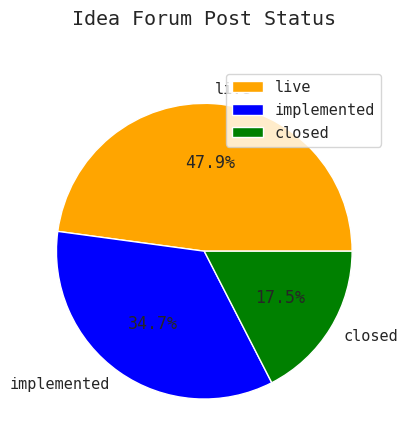

In [234]:
# Idea status distribution
ax = posts.keyword.value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, label=None, title='Idea Forum Post Status', colors=["orange", "blue", "green"])
ax.set_ylabel('')

Text(0, 0.5, '# of Times')

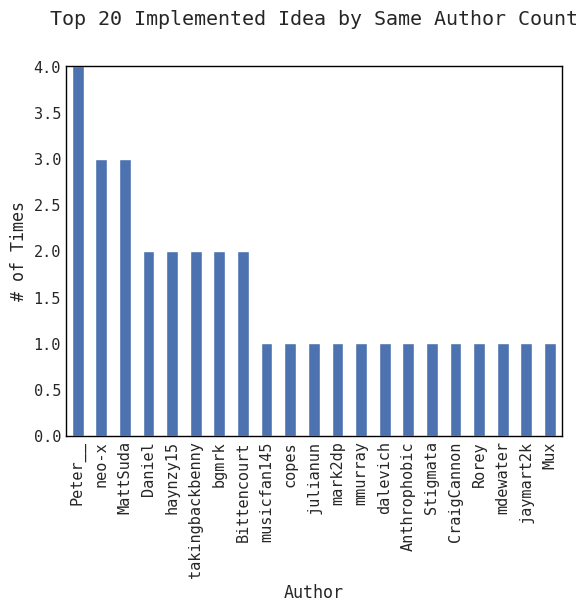

In [235]:
# implemented & author correlation
num_authors = 20
same_author_count = posts[(posts['keyword'] == 'implemented') & (posts['author'] != 'user-removed')].author.value_counts()
ax = same_author_count.iloc[0:num_authors+1].plot(kind='bar', title= 'Top ' + str(num_authors) + ' Implemented Idea by Same Author Count')
ax.set_xlabel('Author')
ax.set_ylabel('# of Times')

In [236]:
same_author_count

author
Peter__         4
neo-x           3
MattSuda        3
Daniel          2
haynzy15        2
               ..
hugzvieira      1
z-_0zia17qi5    1
mkmkmk          1
gREENNNNN       1
COCCIDIOIDES    1
Name: count, Length: 293, dtype: int64

count
1    285
2      5
3      2
4      1
Name: count, dtype: int64


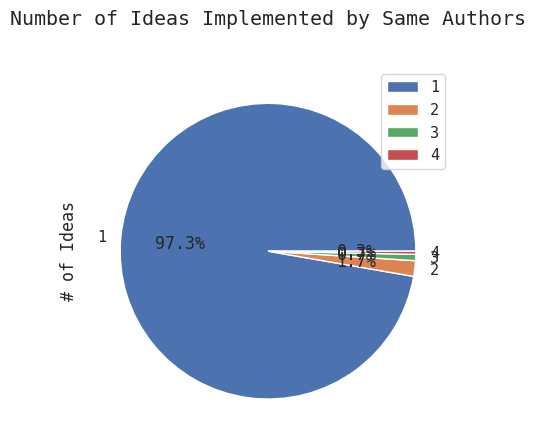

In [237]:
# Percentage distribution of same author ideas implemented N=[1, 2, 3, 4] # of times
ax = same_author_count.value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, title='Number of Ideas Implemented by Same Authors')
ax.set_ylabel('# of Ideas')
print(same_author_count.value_counts())

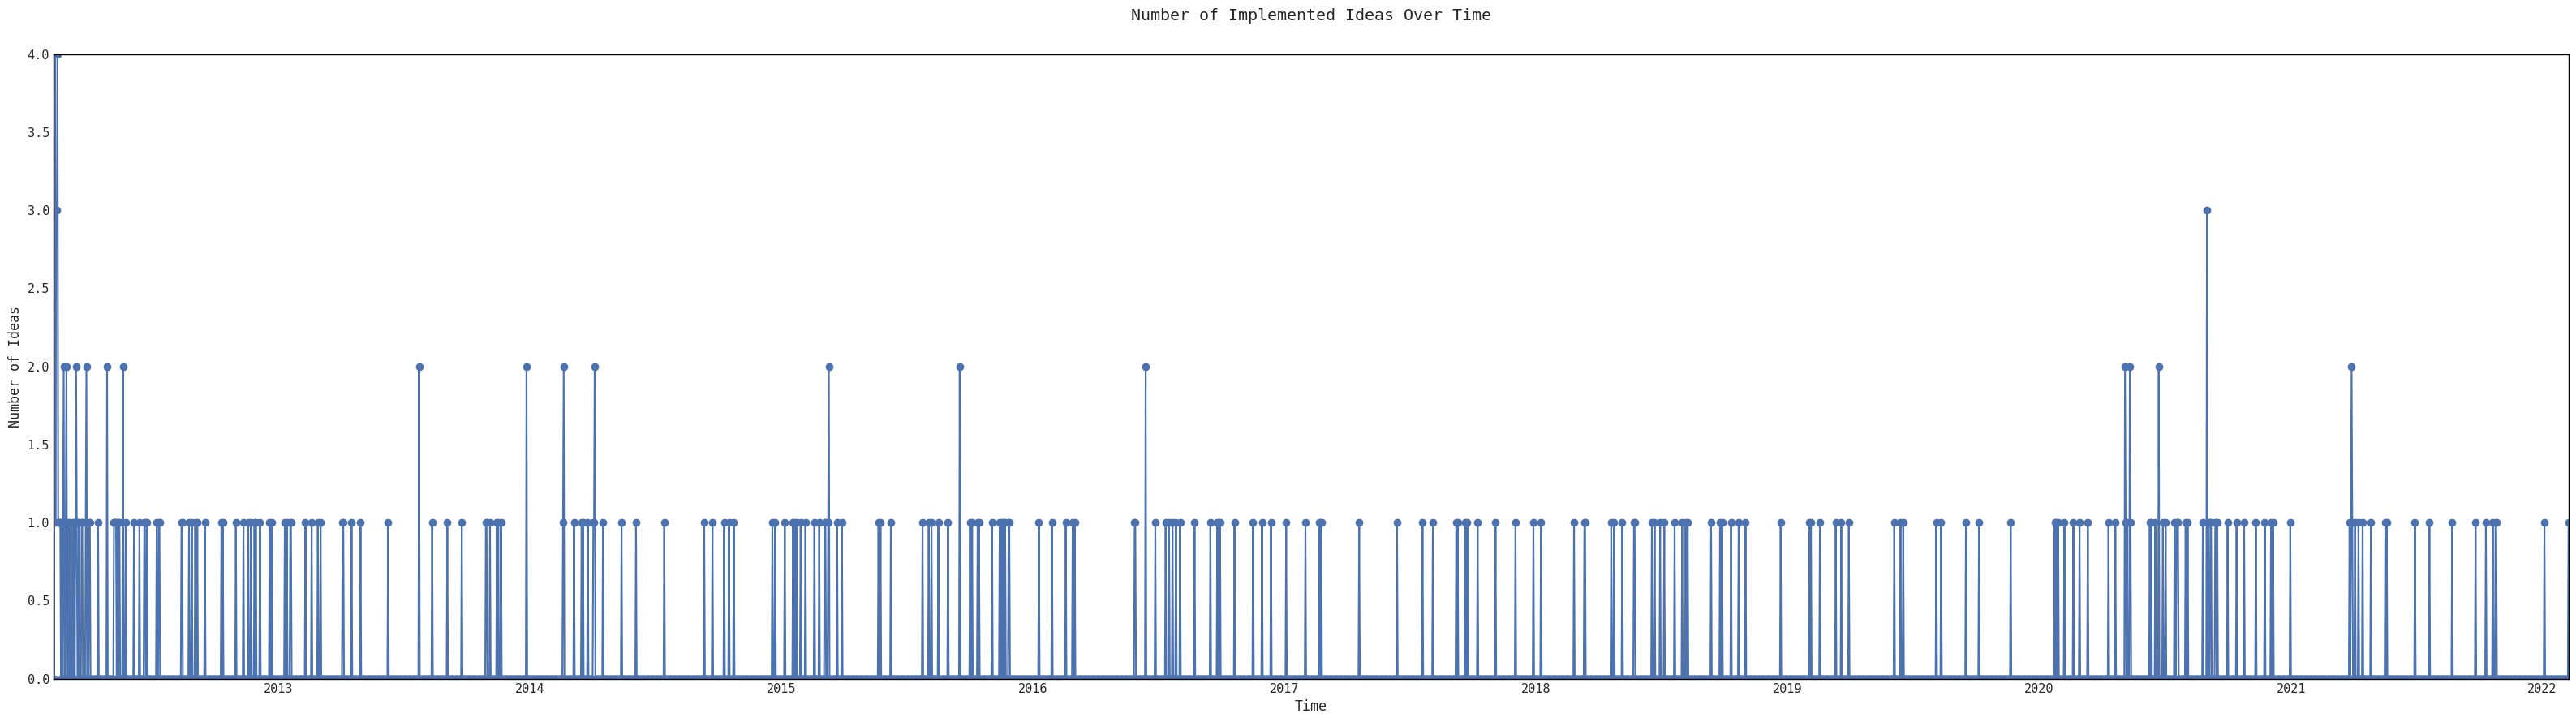

In [238]:
# implemented ideas over time
count_ideas_time = impl_posts.date.value_counts(sort=False)[::-1]
start_d = min(count_ideas_time.axes[0])
end_d = max(count_ideas_time.axes[0])
dates = pd.date_range(start=start_d, end=end_d, freq="D")
ideas_counts = [0] * len(dates)
for idx, d in enumerate(dates):
    date = re.search("20[0-9]{2}-[0-9]{2}-[0-9]{2}", str(d)).group()
    if date in count_ideas_time:
        ideas_counts[idx] = count_ideas_time[date]

plt.figure(figsize=(40,10))
plt.plot(dates, ideas_counts, linestyle='-', marker='o')
plt.title("Number of Implemented Ideas Over Time")
plt.xlabel("Time")
plt.ylabel("Number of Ideas")
plt.show()

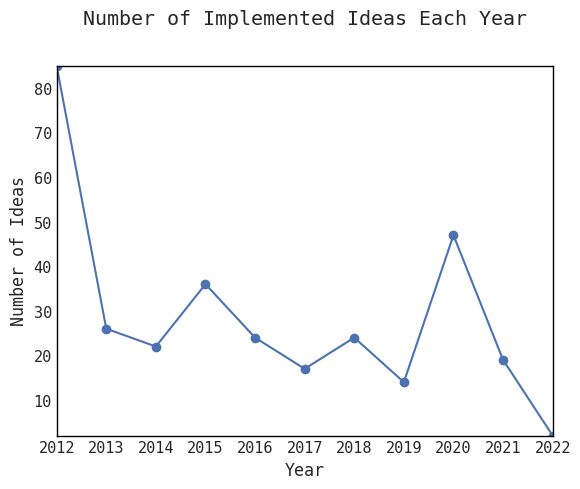

In [239]:
count_ideas_year = impl_posts.date.str.extract(r'(20[0-9]{2})').value_counts(sort=False)
year_counts = count_ideas_year.tolist()
years = [count_ideas_year.axes[0][i][0] for i in range(len(count_ideas_year.axes[0]))]
plt.plot(years, year_counts, linestyle='-', marker='o')
plt.title("Number of Implemented Ideas Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Ideas")
plt.show()

In [240]:
impl_posts.groupby('keyword')['votes'].mean()

keyword
implemented    1471.844937
Name: votes, dtype: float64

In [264]:
# year_mean_serie = impl_posts.groupby('year')['votes'].mean()
# impl_posts['mean_year'] = impl_posts['year'].map(year_mean_serie)
impl_posts.groupby('keyword')['year'].value_counts()

keyword      year
implemented  2012    85
             2020    47
             2015    36
             2013    26
             2016    24
             2018    24
             2014    22
             2021    19
             2017    17
             2019    14
             2022     2
Name: count, dtype: int64

In [265]:
impl_posts_2020 = impl_posts.loc[impl_posts.year == '2020']

In [270]:
from datetime import datetime as dt
import calendar

# https://pynative.com/python-get-the-day-of-week/

# impl_posts_2020.date.map(lambda x: dt.strptime(x, "%Y-%m-%d").weekday())
impl_posts_2020['weekday'] = impl_posts_2020.date.map(lambda x: dt.strptime(x, "%Y-%m-%d").strftime('%A'))

/var/folders/8d/h9kpfzhn62g2sh22v0q3bm200000gn/T/ipykernel_67848/2381785819.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  impl_posts_2020['weekday'] = impl_posts_2020.date.map(lambda x: dt.strptime(x, "%Y-%m-%d").strftime('%A'))


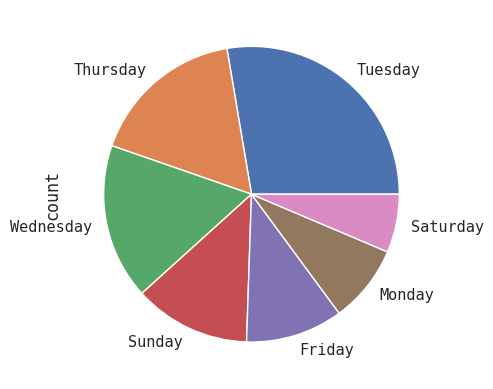

In [278]:
# impl_posts_2020.plot.pie(subplots=True)
impl_posts_2020.weekday.value_counts().plot.pie();

In [279]:
impl_posts['weekday'] = impl_posts.date.map(lambda x: dt.strptime(x, "%Y-%m-%d").strftime('%A'))

/var/folders/8d/h9kpfzhn62g2sh22v0q3bm200000gn/T/ipykernel_67848/362295023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  impl_posts['weekday'] = impl_posts.date.map(lambda x: dt.strptime(x, "%Y-%m-%d").strftime('%A'))


In [281]:
impl_posts['monthday'] = impl_posts.date.map(lambda x: dt.strptime(x, "%Y-%m-%d").strftime("%d"))

/var/folders/8d/h9kpfzhn62g2sh22v0q3bm200000gn/T/ipykernel_67848/3204399522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  impl_posts['monthday'] = impl_posts.date.map(lambda x: dt.strptime(x, "%Y-%m-%d").strftime("%d"))


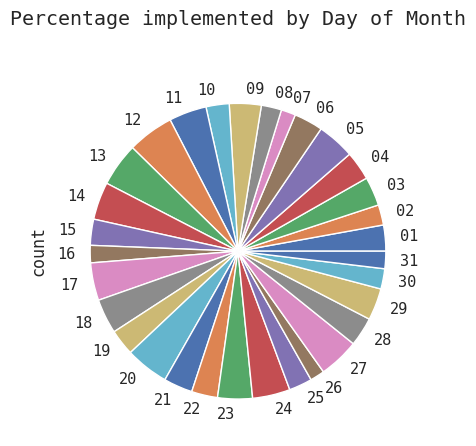

In [285]:
impl_posts.monthday.value_counts().sort_index().plot.pie(title="Percentage implemented by Day of Month");

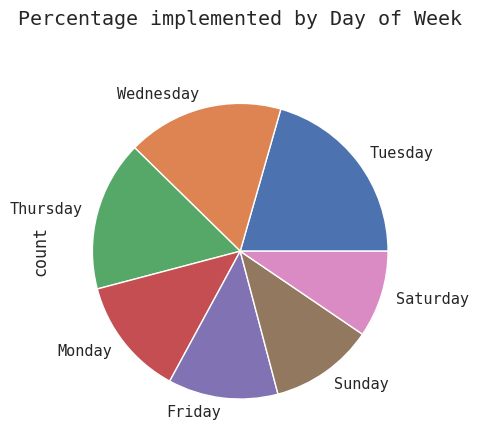

In [286]:
impl_posts.weekday.value_counts().plot.pie(title="Percentage implemented by Day of Week");

In [297]:
# p1 = sns.heatmap(impl_posts.weekday.value_counts().values[:, np.newaxis])

In [252]:
# Calendar heatmap 
import july
from july.utils import date_range

dates = date_range("2020-01-01", "2020-12-31")
data = np.random.randint(0, 14, len(dates))

<Axes: title={'center': 'Github Activity'}>

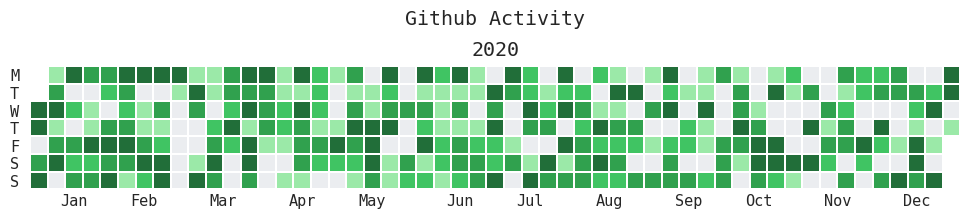

In [253]:
# GitHub Activity like plot (for someone with consistently random work patterns).
july.heatmap(dates, data, title='Github Activity', cmap="github")

In [248]:
# more options here
# https://github.com/e-hulten/july
# july.heatmap(dates, impl_posts['day'].value_counts().sort_index().values, title='Github Activity', cmap="github")

<Axes: title={'center': 'January'}>

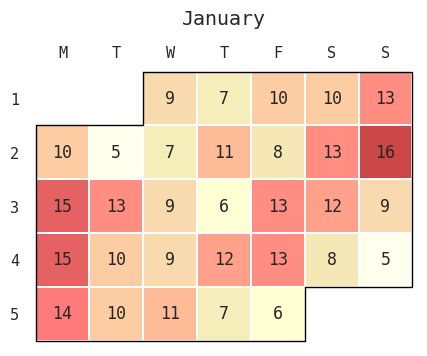

In [289]:
july.month_plot(dates, impl_posts['day'].value_counts().sort_index().values, value_label=True)

In [166]:
impl_posts['day'] = impl_posts.date.str.extract(r'20[0-9]{2}-[0-9]{2}-([0-9]{2})')

In [191]:
impl_posts['day'].value_counts().sort_index().values

array([ 9,  7, 10, 10, 13, 10,  5,  7, 11,  8, 13, 16, 15, 13,  9,  6, 13,
       12,  9, 15, 10,  9, 12, 13,  8,  5, 14, 10, 11,  7,  6])

In [192]:
len(impl_posts['day'].value_counts().sort_index().values)

31